Presented By:Sony Sinha
             Data Science Intern
             Jan 2023

Organisation :Lets Grow More

Perform Exploratory Data Analysis on Dataset "Global Terrorism"

Problem Statement: As a security/defense analyst, try to find out Hot zone of terrorism. What all insights, EDA can drive?

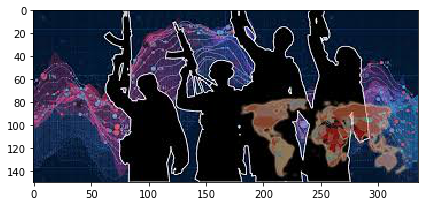

In [1]:
from skimage import io
image =io.imread("C:/Users/nawin/Downloads/globalterrorism.jfif")
io.imshow(image)

In [2]:
##  importing libraries

# Reading the data
import pandas as pd
import numpy as np

# Visualization of data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Profile Report
from pandas_profiling import ProfileReport

# Warnings
import warnings
warnings.filterwarnings('ignore')

##observation: pandas, numpy, matplotlib, linear_model libraries got imported

Data Ingestion

In [3]:
## reading the data
data=pd.read_csv("C:/Users/nawin/globalterrorismdb_071dist.csv",encoding='latin-1')

In [4]:
## Printing the first five rows of data
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
## Printing the number of rows and columns 
print("The number of rows and columns respectively are:",data.shape)

The number of rows and columns respectively are: (181691, 135)


In [6]:
## Printing the name of Attributes
print("The name of Attributes are:",data.columns)

The name of Attributes are: Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


Data Cleaning

In [7]:
## Checking sum of null values of each attributes
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
## Printing datatypes of attributes
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [9]:
## Considering only below columns/attributes
data=data[["iyear","imonth","iday","country_txt","region_txt","success","city","attacktype1_txt","targtype1_txt",
       "gname","weaptype1_txt","nkill","nwound"]]

## Displaying the first five rows 
data.head()

,iyear,imonth,iday,country_txt,region_txt,success,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,1,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,1,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,1,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,1,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,1,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [10]:
## New column of Casualty
data["nkill"]=data["nkill"].fillna(0)
data["nwound"]=data["nwound"].fillna(0)
data["Casualty"]=data["nkill"] + data["nwound"] 

In [11]:
## Checking duplicated values 
data.duplicated().sum()

14267

In [12]:
## Dropping duplicated values
data.drop_duplicates(inplace=True)

In [13]:
## Checking duplicated values
data.duplicated().sum()

0

In [14]:
## Fetching if missing values present
data.isnull().any()

iyear              False
imonth             False
iday               False
country_txt        False
region_txt         False
success            False
city                True
attacktype1_txt    False
targtype1_txt      False
gname              False
weaptype1_txt      False
nkill              False
nwound             False
Casualty           False
dtype: bool

In [15]:
## Fetching the sum of missing values
data.isnull().sum()

iyear                0
imonth               0
iday                 0
country_txt          0
region_txt           0
success              0
city               413
attacktype1_txt      0
targtype1_txt        0
gname                0
weaptype1_txt        0
nkill                0
nwound               0
Casualty             0
dtype: int64

In [16]:
## Replacing missing values with mode
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [17]:
## Summing values of missing values
data.isnull().sum()

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
success            0
city               0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
Casualty           0
dtype: int64

In [18]:
print("The statistical summary is:\n",data.describe().T)

The statistical summary is:
              count         mean        std     min     25%     50%     75%  \
iyear     167424.0  2003.132305  13.140172  1970.0  1991.0  2009.0  2014.0   
imonth    167424.0     6.470345   3.391033     0.0     4.0     6.0     9.0   
iday      167424.0    15.524728   8.814322     0.0     8.0    15.0    23.0   
success   167424.0     0.888857   0.314310     0.0     1.0     1.0     1.0   
nkill     167424.0     2.419892  11.658857     0.0     0.0     0.0     2.0   
nwound    167424.0     3.078931  35.713914     0.0     0.0     0.0     2.0   
Casualty  167424.0     5.498823  42.196439     0.0     0.0     1.0     4.0   

             max  
iyear     2017.0  
imonth      12.0  
iday        31.0  
success      1.0  
nkill     1570.0  
nwound    8191.0  
Casualty  9574.0  


Data Visualization

In [19]:
## Number of attacks each year
Number_of_Attacks=data["iyear"].value_counts().sort_index().to_frame().reset_index().rename(columns={"index":"Year","iyear":"Attacks"}).set_index("Year")

## Displaying 
Number_of_Attacks.head(10)

,Attacks
Year,
1970,612
1971,449
1972,488
1973,462
1974,532
1975,692
1976,849
1977,1160
1978,1406


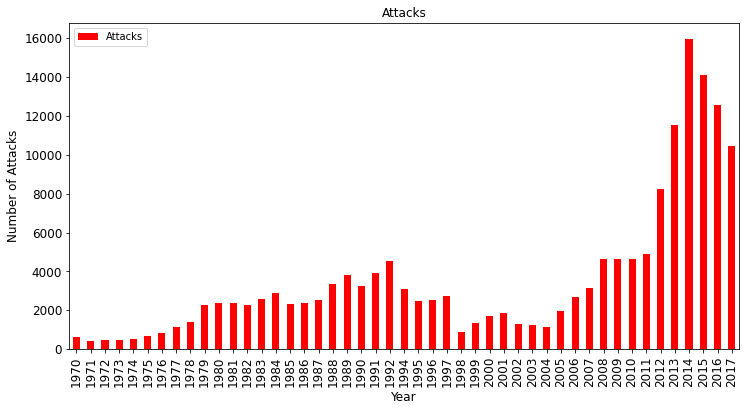

In [20]:
## Plotting Number of Attacks vs Year
Number_of_Attacks.plot(kind="bar",color="red",figsize=(12,6),fontsize=12)
plt.title("Attacks",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

#The most number of Attacks in 2014
#The least number of Attacks in 1971

In [21]:
## Number of killed in each year
Number_of_Killed=data[["iyear","nkill"]].groupby("iyear").sum()
Number_of_Killed.head()

,nkill
iyear,
1970,173.0
1971,172.0
1972,554.0
1973,366.0
1974,534.0


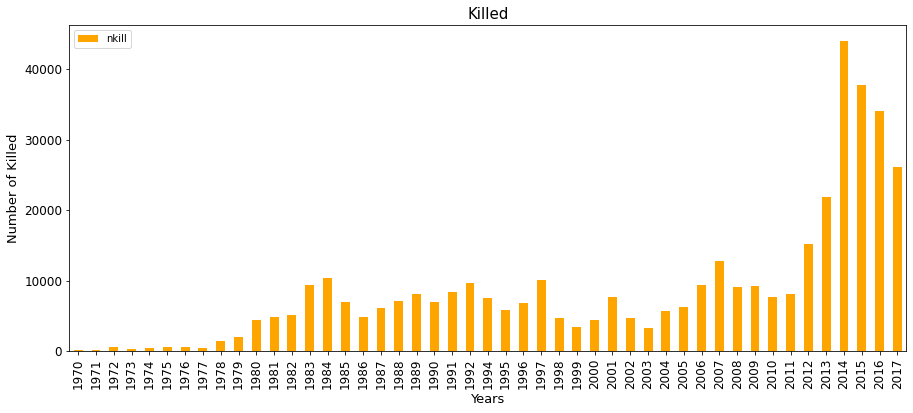

In [22]:
## Number of killed vs Years
Number_of_Killed.plot(kind="bar",color="orange",figsize=(15,6),fontsize=12)
plt.title("Killed",fontsize=15)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of Killed",fontsize=13)
plt.show()

#The most killed in 2014
#The least in 1970

In [23]:
## Number of Casualty in each year
Number_of_Casualty=data[["iyear","Casualty"]].groupby("iyear").sum()
Number_of_Casualty.head()

,Casualty
iyear,
1970,385.0
1971,254.0
1972,957.0
1973,861.0
1974,1398.0


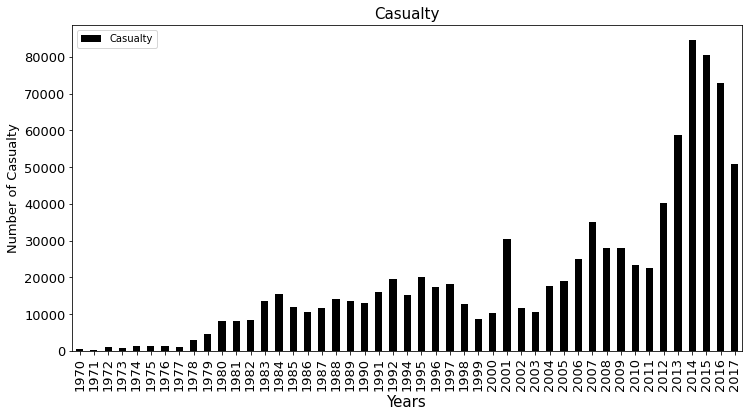

In [24]:
## Number of Casualty vs Years
Number_of_Casualty.plot(kind="bar",color="black",figsize=(12,6),fontsize=13)
plt.title("Casualty",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

#The most killed in 2014
#The least in 1971

In [25]:
## Targert type in Casualty
target=data[["targtype1_txt","Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
target

,Casualty
targtype1_txt,
Private Citizens & Property,312995.0
Military,175240.0
Police,116835.0
Business,76507.0
Government (General),66268.0
Transportation,54017.0
Religious Figures/Institutions,37087.0
Terrorists/Non-State Militia,17141.0
Educational Institution,13636.0


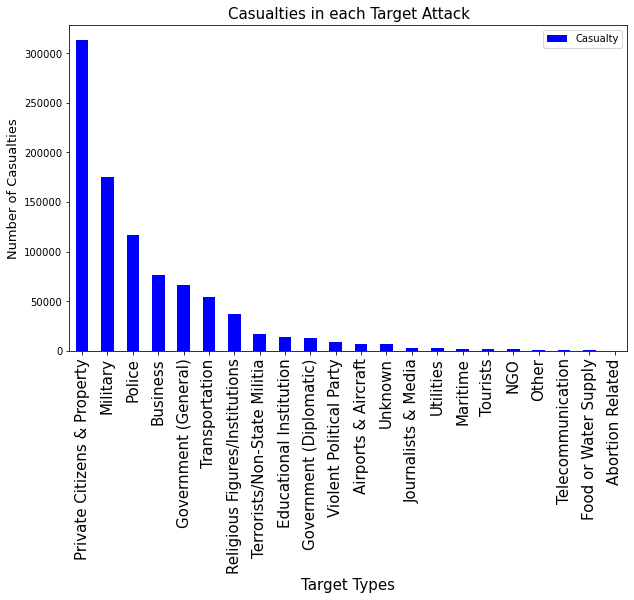

In [26]:
## Number of casualities in each Target

target.plot(kind="bar",color="blue",figsize=(10,6))
plt.title("Casualties in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [27]:
## Target type in killed
target=data[["targtype1_txt","nkill"]].groupby("targtype1_txt").sum().sort_values(by="nkill",ascending=False)
target

,nkill
targtype1_txt,
Private Citizens & Property,137853.0
Military,104732.0
Police,52731.0
Government (General),25690.0
Business,23131.0
Transportation,13808.0
Religious Figures/Institutions,13190.0
Terrorists/Non-State Militia,8969.0
Unknown,3993.0


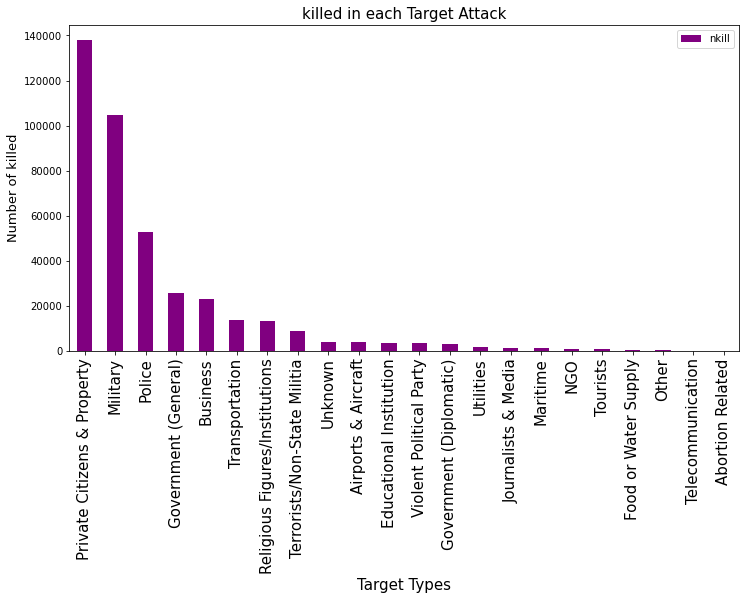

In [28]:
## Number of killed vs Target type
target.plot(kind="bar",color="purple",figsize=(12,6))
plt.title("killed in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of killed",fontsize=13)
plt.show()

In [29]:
## Target type in wounded
target=data[["targtype1_txt","nwound"]].groupby("targtype1_txt").sum().sort_values(by="nwound",ascending=False)
target

,nwound
targtype1_txt,
Private Citizens & Property,175142.0
Military,70508.0
Police,64104.0
Business,53376.0
Government (General),40578.0
Transportation,40209.0
Religious Figures/Institutions,23897.0
Government (Diplomatic),10226.0
Educational Institution,9967.0


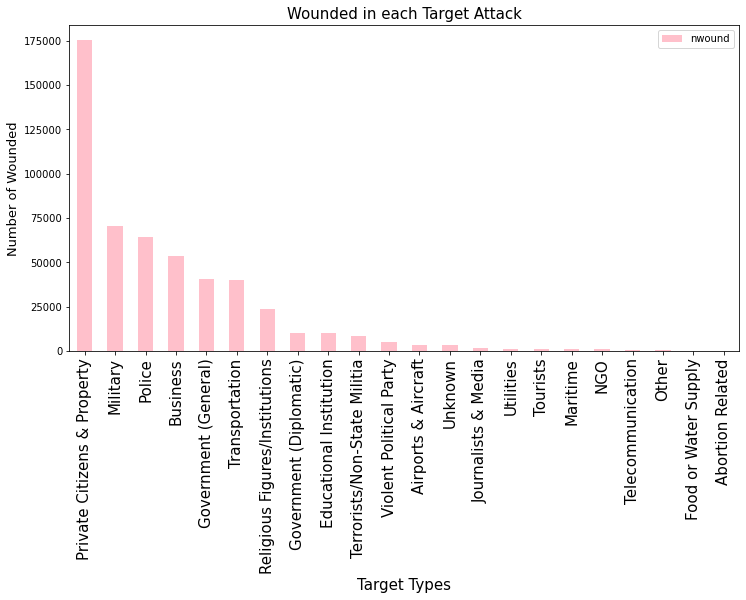

In [30]:
## Number of wounded vs Target Type
target.plot(kind="bar",color="pink",figsize=(12,6))
plt.title("Wounded in each Target Attack",fontsize=15)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

<AxesSubplot:title={'center':'Attacks'}, xlabel='region_txt', ylabel='count'>

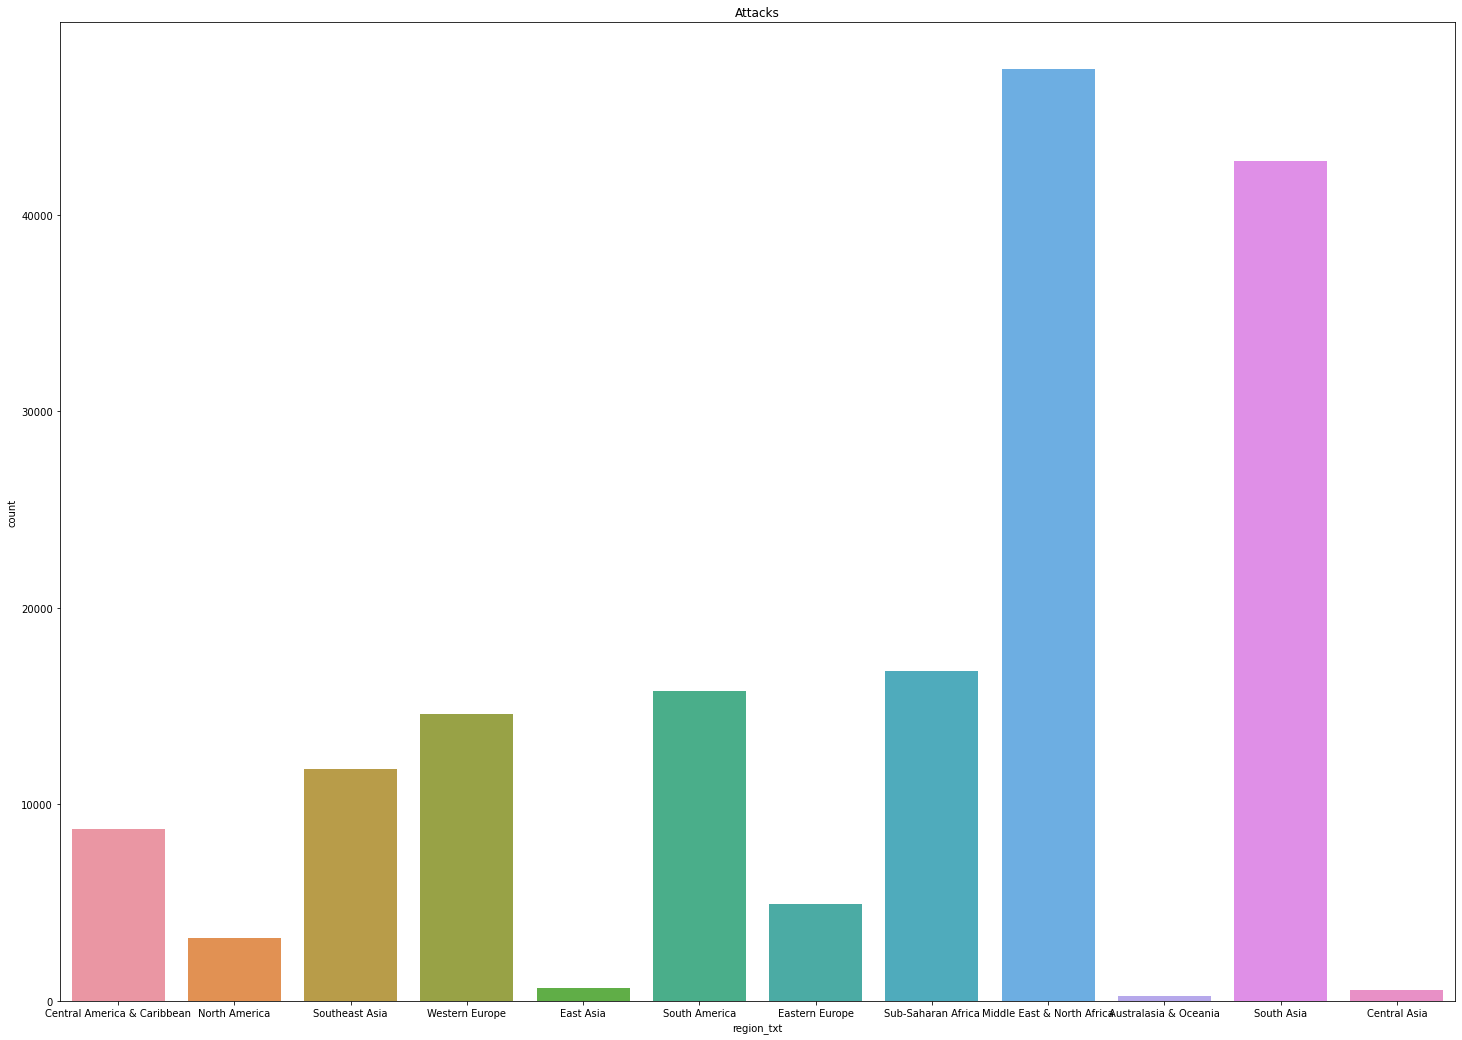

In [31]:
## Countplot
plt.figure(figsize=(25,18))
plt.title('Attacks')
sns.countplot(x=data.region_txt)

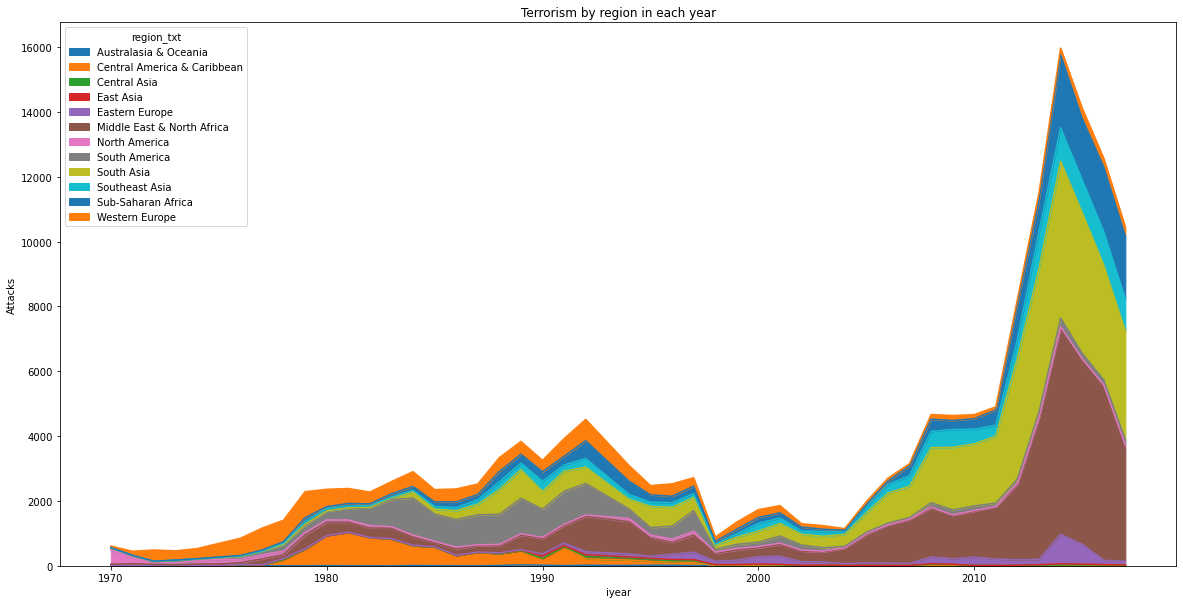

In [32]:
## Terrorism Vs Attacks
region=pd.crosstab(data.iyear,data.region_txt).plot(kind='area',figsize=(20,10))
plt.title('Terrorism by region in each year')
plt.ylabel('Attacks')
plt.show()

Text(0.5, 1.0, 'terrorism attacks over years')

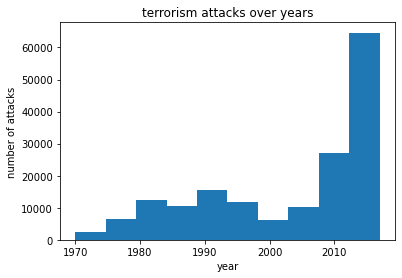

In [33]:
## Terrorism attacks over years
data['iyear'].plot.hist() 
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.title('terrorism attacks over years')

Text(0.5, 1.0, 'Success Status of terrorism attacks')

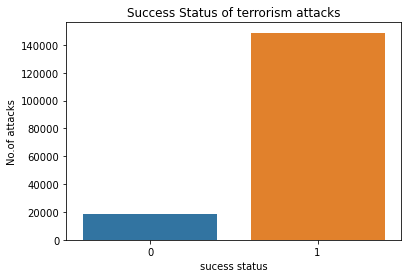

In [34]:
## Success Status
sns.countplot(x='success',data=data)
plt.xlabel('sucess status')
plt.ylabel('No.of attacks')
plt.title('Success Status of terrorism attacks')

In [35]:
## Top 5 cities with highest terrorism attacks
data['city'].value_counts().nlargest(5)

Unknown    8208
Baghdad    7327
Karachi    2114
Mosul      2027
Belfast    1935
Name: city, dtype: int64

<AxesSubplot:>

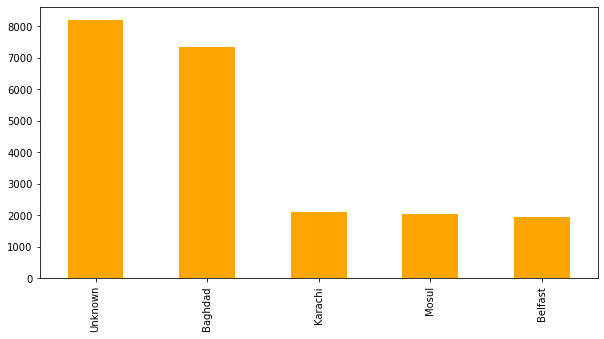

In [36]:
data['city'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,5),color=['orange'])

Conclusion: The insights gathered from the dataset includes: 

Number of terrorism attacks were increases rapidly after 2010.
Out of total terrorism attacks very few attacks were failed and almost all the terrorism attacks succeded. 
Top five cities with highest number of attacks are Baghdad,Karachi,Lima and Mosul. 
Compare to all the other countries number of terrorist attacks in Baghdad is very high.